   layer_start  layer_stop  size_tail_y  size_tail_x  block_fault_rate  \
0           15          15           32           32               0.2   
1           15          15           32           32               0.2   
2           15          15           32           32               0.2   
3           15          15           32           32               0.2   
4           15          15           32           32               0.2   

   neuron_fault_rate  bit_faulty_pos  gold_ACC@1  gold_ACC@k  img_Top1_Crit  \
0                0.1              19   76.474998       98.75              9   
1                0.1              19   76.474998       98.75             10   
2                0.1              19   76.474998       98.75             15   
3                0.1              19   76.474998       98.75              9   
4                0.1              19   76.474998       98.75             17   

   img_Top1_SDC  img_Top1_Masked  img_Topk_Crit  img_Topk_SDC  \
0          7991

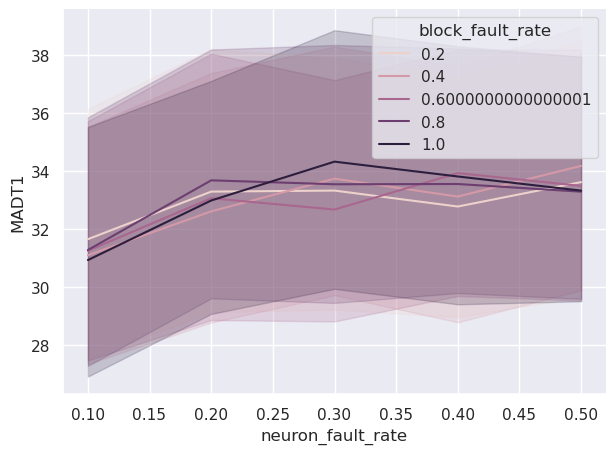

In [31]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

PWD=os.getcwd()
#path="FSIMs/N_Results_cnf_5_lyr_0-15/FSIM_logs/split5_faulty_neurons_0/fsim_full_report.csv"
path="FSIMs_1/N_Results_cnf_5_lyr15/FSIM_logs/split5_faulty_neurons_15/fsim_full_report.csv"
#path="FSIMs/N_Results_cnf_5_lyr15/FSIM_logs/split5_faulty_neurons_15/Misclassified_images_report.csv"
#path="FSIMs/W_Results_cnf_5_lyr0/FSIM_logs/split5_faulty_weights_0/Misclassified_images_report.csv"

fsim_report= pd.read_csv(os.path.join(PWD,path),index_col=[0]) 
df_pivot=fsim_report
print(df_pivot.head())
filtered_data=df_pivot

index = (df_pivot['bit_faulty_pos']<32)

filtered_data['MADT1']=abs(filtered_data['fault_ACC@1']-filtered_data['gold_ACC@k'])

print(filtered_data.describe())

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=filtered_data.loc[index],x='neuron_fault_rate',y='MADT1',hue='block_fault_rate')
#ax.set_yscale('log')

In [32]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PWD=os.getcwd()
#path="FSIMs/N_Results_cnf_5_lyr_0-15/FSIM_logs/split5_faulty_neurons_0/fsim_full_report.csv"
#path="FSIMs/N_Results_cnf_5_lyr15/FSIM_logs/split5_faulty_neurons_15/fsim_full_report.csv"
#path="FSIMs/N_Results_cnf_5_lyr15/FSIM_logs/split5_faulty_neurons_15/Misclassified_images_report.csv"
df_pivot=pd.DataFrame()
for idx in range(16):
    path=f"FSIMs_1/W_Results_cnf_5_lyr{idx}/FSIM_logs/split5_faulty_weights_{idx}/fsim_full_report.csv"
    fsim_report= pd.read_csv(os.path.join(PWD,path),index_col=[0])  
    df_pivot=pd.concat([df_pivot,fsim_report],axis=0,ignore_index=True,sort=False)


   layer  kernel  channel  row  col   bitmask  gold_ACC@1  gold_ACC@k  \
0      0      14        1  1.0  1.0  16777216   76.474998       98.75   
1      0       4        0  0.0  2.0  33554432   76.474998       98.75   
2      0       9        0  2.0  2.0   2097152   76.474998       98.75   
3      0       6        2  0.0  1.0   1048576   76.474998       98.75   
4      0       0        1  0.0  2.0  33554432   76.474998       98.75   

   img_Top1_Crit  img_Top1_SDC  ...  Class_Topk  Layer  kernel.1  channel.1  \
0           1370          6471  ...           2    0.0      14.0        1.0   
1            184          7810  ...           2    0.0       4.0        0.0   
2              3          7997  ...           1    0.0       9.0        0.0   
3              3          7997  ...           1    0.0       6.0        2.0   
4            787          7131  ...           2    0.0       0.0        1.0   

   row.1  col.1     BitMask  Ffree_Weight  Faulty_weight  Abs_error  
0    1.0    1.0 

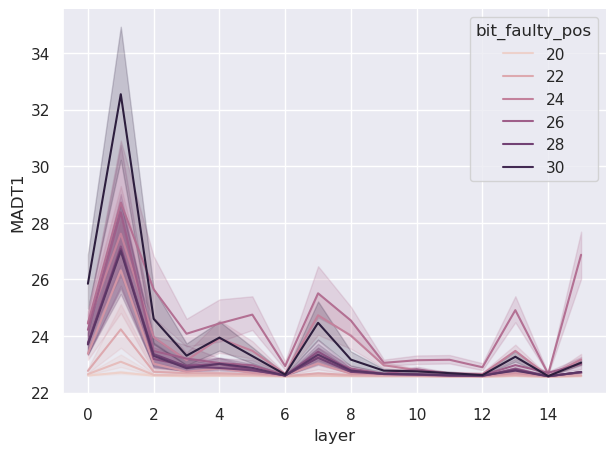

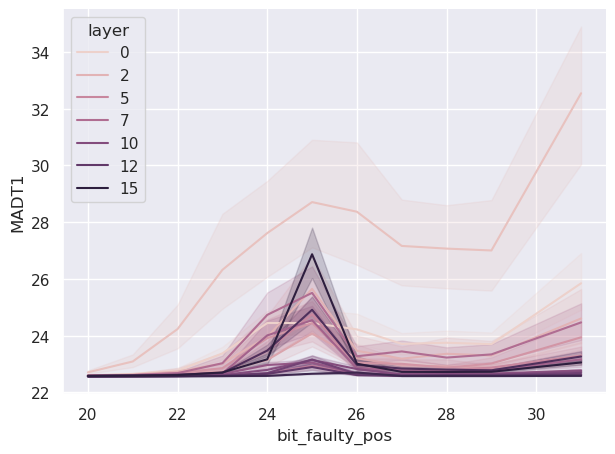

In [33]:

#df_pivot=fsim_report
print(df_pivot.head())
filtered_data=df_pivot


filtered_data['MADT1']=100*abs(filtered_data['fault_ACC@1']-filtered_data['gold_ACC@k'])/filtered_data['gold_ACC@k']
filtered_data['bit_faulty_pos']=np.log2(filtered_data['bitmask'])

index = (df_pivot['bit_faulty_pos']!=30)

print(filtered_data.describe())

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=filtered_data.loc[index],x='layer',y='MADT1',hue='bit_faulty_pos')
#ax.set_yscale('log')

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=filtered_data.loc[index],x='bit_faulty_pos',y='MADT1',hue='layer')
#ax.set_yscale('log')